# This is monthly report analysis of the open government data. This session does data analysis on existing data and prediction

#### Technology used:
    -Jupyter Notebook
    -Python3 with numpy,pandas,matplotlib libraries

#### Analysis done:
    --Correlation betweeen griviences opened and disposed
    --Cumulative data analysis
    --Linear Regression
    --Post Prediction for one more year
    --Inferences
    
#### Revision history:
    Created date: 10-Dec-2019
    Created by: Rajaneesh Acharya
    Version History: V1.0
    


In [1]:
#import numpy and pandas package
import numpy as np
import pandas as pd

#import matplot lib for plotting and let the plotting be inline
%matplotlib inline
import matplotlib.pyplot as plt
#used for date formatting
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#used for creating linear regression, splitting train test data, training, encoding and getting learning confidence level
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as ttsplit
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import LabelEncoder as le

#during report generation ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read all the records to MonthlyDeptdatafile. 
#Please note all the delimiter are "^" as delimiters of ";","&" etc will possibly be in comments
data=pd.read_csv("MonthlyDeptdatafile.csv", sep='^',parse_dates=[[1,2]])


In [3]:
#group the data by organization name in order to seggregate department/state performance. List out all departments and states
group_data=data.groupby('org_name')

for name,group in group_data:
   print(name, end=', ')
    #print(group)
    #plt.figure()
    #plt.plot(group['Recetpts'])
    #plt.show()
    

Central Board of Direct Taxes (Income Tax), Central Board of Indirect Taxes and Customs, Committee on Petitions Rajya Sabha, Department of Administrative Reforms and PG, Department of Agriculture Research and Education, Department of Agriculture, Cooperation and Farmers Welfare, Department of Animal Husbandry, Dairying, Department of Atomic Energy, Department of Bio Technology, Department of Chemicals and Petrochemicals, Department of Commerce, Department of Consumer Affairs, Department of Defence, Department of Defence Finance, Department of Defence Production, Department of Defence Research and Development, Department of Economic Affairs ACC Division, Department of Empowerment of Persons with Disabilities, Department of Ex Servicemen Welfare, Department of Expenditure, Department of Fertilizers, Department of Financial Services (Banking Division), Department of Financial Services (Insurance Division), Department of Financial Services (Pension Reforms), Department of Fisheries, Depart

# Departmentwise griviences filed and disposal analysis

### Type of analysis:
    Plot of griviences filed and disposed every is plotted and correlation of 
    both of them is done fo top 15 departments. If there is a strong correlation 
    between the rate at which it is filed and disposed off, then it means the
    griviences are effectively handled.

### States:
    Department of Financial Services (Banking Division)
    Department of Telecommunications
    Ministry of Railways ( Railway Board)
    Department of Posts
    Central Board of Direct Taxes (Income Tax) 
    Ministry of Labour and Employment
    Ministry of Home Affairs
    Department of Personnel and Training
    Department of Revenue
    Department of Higher Education 
    Department of Health & Family Welfare 
    Ministry of Petroleum and Natural Gas 
    Central Board of Indirect Taxes and Customs 
    Department of School Education and Literacy 
    Department of Defence
    
### Observations:

    Higher the positive correlation between the rate at which the griviences are filed 
    and disposed, better is the rate at which it is disposed off qualitatively
    
    

In [4]:
# Function to print department header in the report

def print_stateName_header(dept):
    print(dept+":")
    print("")

In [5]:
#Function to plot the departmentwise reciept and disposal of the griviences

def plot_graph(dept_dataframe):
    plt.rcParams['figure.figsize'] = [12, 4]
    fig, ax= plt.subplots(1,2)
    ax[0].plot(dept_dataframe.Year_Month, dept_dataframe.Recetpts)
    ax[1].plot(dept_dataframe.Year_Month, dept_dataframe.Disposals,'tab:red')
    ax[0].set_title('Recieved Grieviences')
    ax[1].set_title('Disposed Grieviences')
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('number')
    ax[1].set_xlabel('time')
    ax[1].set_ylabel('number')
    ax[0].xaxis.set_major_locator(plt.MaxNLocator(4))
    ax[1].xaxis.set_major_locator(plt.MaxNLocator(4))
    _fmt = mdates.DateFormatter('%m/%Y')
    ax[0].xaxis.set_major_formatter(_fmt) 
    ax[1].xaxis.set_major_formatter(_fmt) 
    plt.show()

In [6]:
# function to compute correlation between reciept and dispposal of griviences

def print_correlation(dept_dataframe):
    print("Correlation matrix for  "+dept+" between grievences opened and griviences disposed")
    print("")
    print(np.corrcoef(dept_dataframe.Recetpts,dept_dataframe.Disposals))
    print("")

Department of Financial Services (Banking Division):



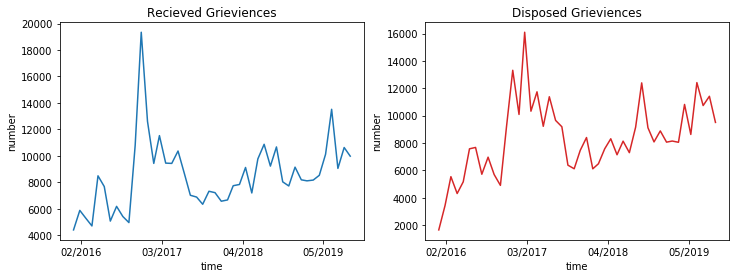

Correlation matrix for  Department of Financial Services (Banking Division) between grievences opened and griviences disposed

[[1.         0.59550168]
 [0.59550168 1.        ]]

Department of Telecommunications:



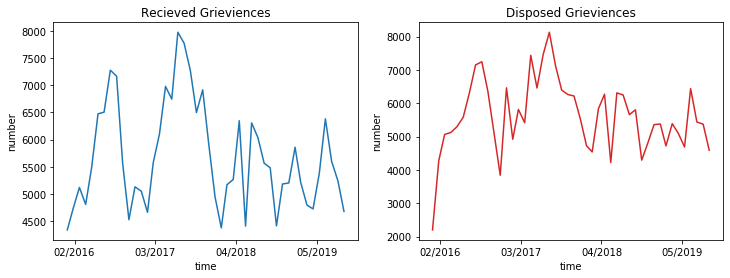

Correlation matrix for  Department of Telecommunications between grievences opened and griviences disposed

[[1.         0.84830562]
 [0.84830562 1.        ]]

Ministry of Railways ( Railway Board):



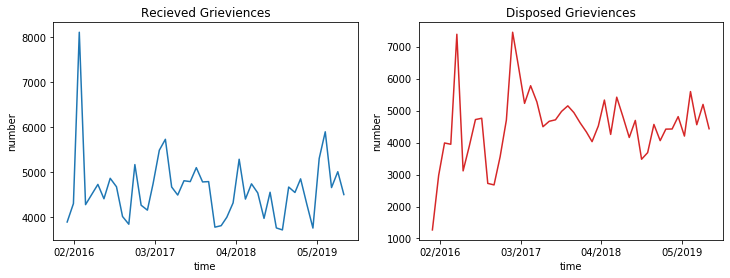

Correlation matrix for  Ministry of Railways ( Railway Board) between grievences opened and griviences disposed

[[1.         0.23049495]
 [0.23049495 1.        ]]

Department of Posts:



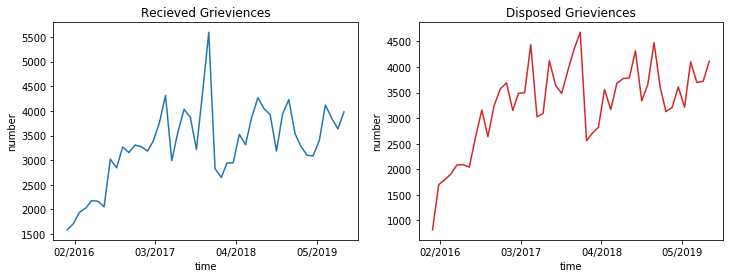

Correlation matrix for  Department of Posts between grievences opened and griviences disposed

[[1.        0.8598838]
 [0.8598838 1.       ]]

Central Board of Direct Taxes (Income Tax):



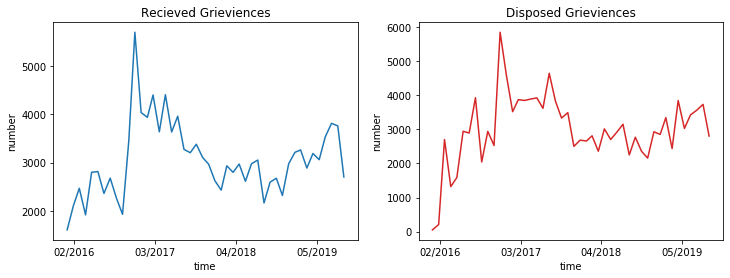

Correlation matrix for  Central Board of Direct Taxes (Income Tax) between grievences opened and griviences disposed

[[1.         0.80226204]
 [0.80226204 1.        ]]

Ministry of Labour and Employment:



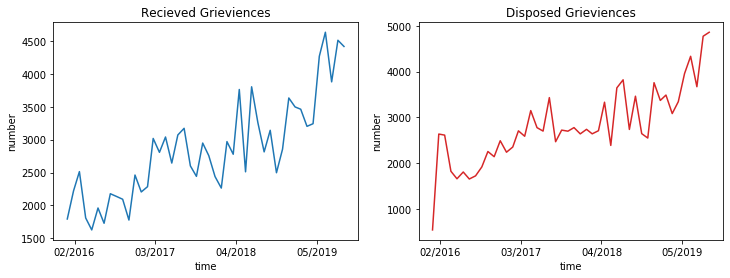

Correlation matrix for  Ministry of Labour and Employment between grievences opened and griviences disposed

[[1.         0.92688548]
 [0.92688548 1.        ]]

Ministry of Home Affairs:



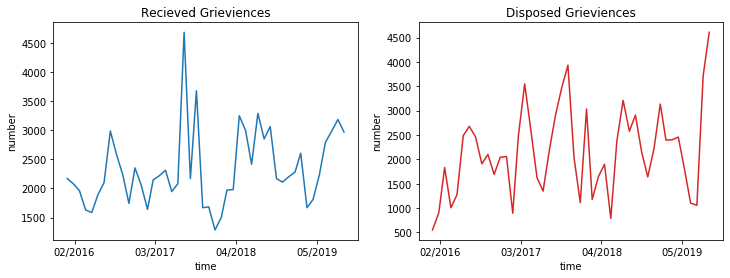

Correlation matrix for  Ministry of Home Affairs between grievences opened and griviences disposed

[[1.         0.26762115]
 [0.26762115 1.        ]]

Department of Personnel and Training:



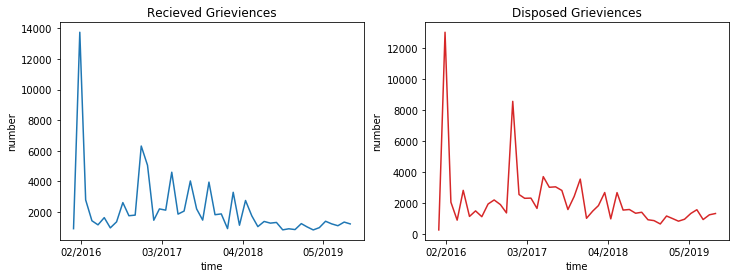

Correlation matrix for  Department of Personnel and Training between grievences opened and griviences disposed

[[1.         0.81569766]
 [0.81569766 1.        ]]

Department of Revenue:



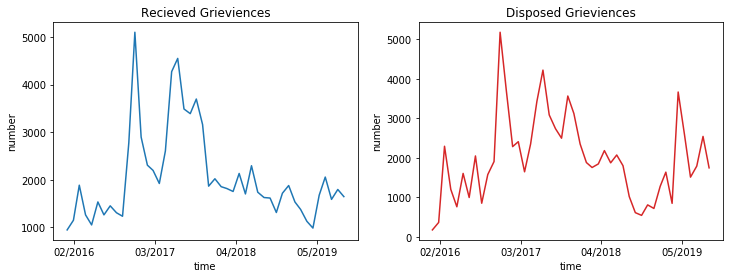

Correlation matrix for  Department of Revenue between grievences opened and griviences disposed

[[1.         0.77007556]
 [0.77007556 1.        ]]

Department of Higher Education:



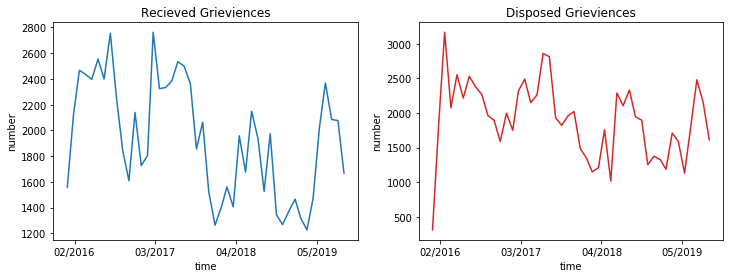

Correlation matrix for  Department of Higher Education between grievences opened and griviences disposed

[[1.         0.69581132]
 [0.69581132 1.        ]]

Department of Health & Family Welfare:



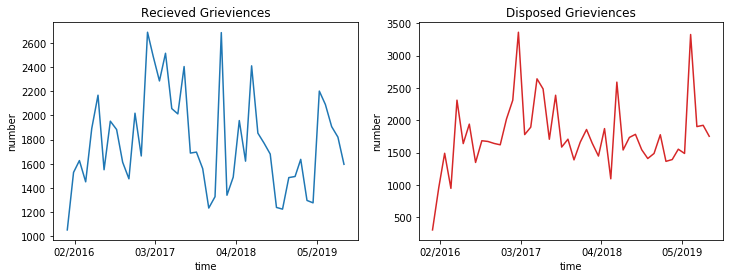

Correlation matrix for  Department of Health & Family Welfare between grievences opened and griviences disposed

[[1.         0.57460172]
 [0.57460172 1.        ]]

Ministry of Petroleum and Natural Gas:



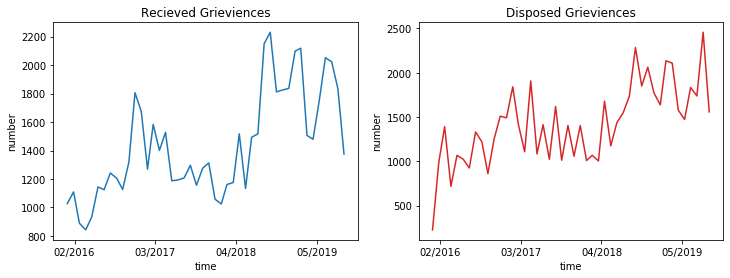

Correlation matrix for  Ministry of Petroleum and Natural Gas between grievences opened and griviences disposed

[[1.         0.76244879]
 [0.76244879 1.        ]]

Central Board of Indirect Taxes and Customs:



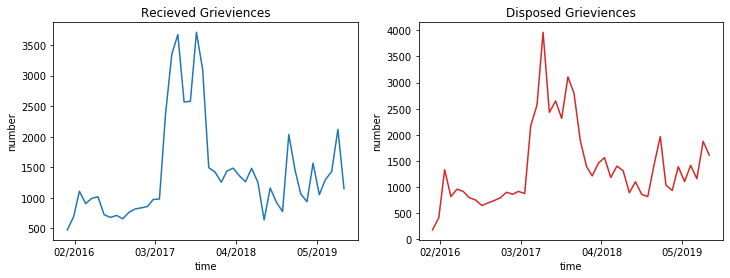

Correlation matrix for  Central Board of Indirect Taxes and Customs between grievences opened and griviences disposed

[[1.         0.89173293]
 [0.89173293 1.        ]]

Department of School Education and Literacy:



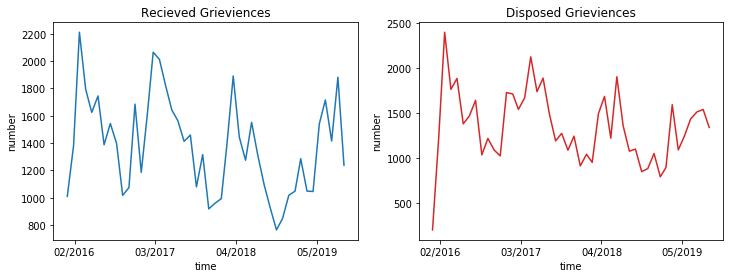

Correlation matrix for  Department of School Education and Literacy between grievences opened and griviences disposed

[[1.         0.68872915]
 [0.68872915 1.        ]]

Department of Defence:



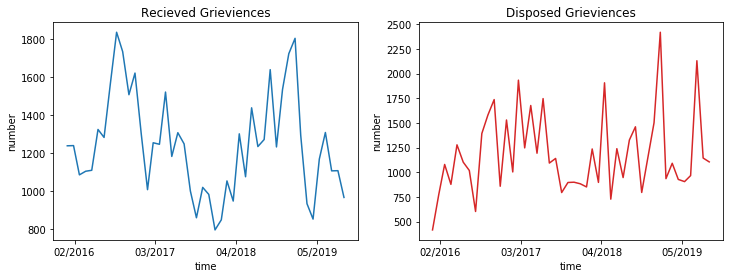

Correlation matrix for  Department of Defence between grievences opened and griviences disposed

[[1.         0.44552301]
 [0.44552301 1.        ]]



In [7]:
# List out top 15 department names. Prints the department header, plots the griviences recieved and disposed and computes the correlation


dept_list = ['Department of Financial Services (Banking Division)', 'Department of Telecommunications', 'Ministry of Railways ( Railway Board)',  
             'Department of Posts', 'Central Board of Direct Taxes (Income Tax)', 'Ministry of Labour and Employment', 'Ministry of Home Affairs', 
             'Department of Personnel and Training', 'Department of Revenue', 'Department of Higher Education', 'Department of Health & Family Welfare', 
             'Ministry of Petroleum and Natural Gas', 'Central Board of Indirect Taxes and Customs', 'Department of School Education and Literacy', 
             'Department of Defence']
for dept in dept_list:
    dept_dataframe=group_data.get_group(dept)
    print_stateName_header(dept)
    plot_graph(dept_dataframe)
    print_correlation(dept_dataframe)
    
    

# Department cumulative analysis for griviences filed and disposed

### Type of analysis:
    Cumulative plot of griviences filed and disposed from 2016 till 2019 October.
    for top 15 departments. Here trend using linear regression is also given. The
    blue line represent cumulative reciept of grievences. The orange line gives
    the cumulative disposal of griviences. The dash blue and orange line represents
    predicted values respectively.

### States:
    Department of Financial Services (Banking Division)
    Department of Telecommunications
    Ministry of Railways ( Railway Board)
    Department of Posts
    Central Board of Direct Taxes (Income Tax) 
    Ministry of Labour and Employment
    Ministry of Home Affairs
    Department of Personnel and Training
    Department of Revenue
    Department of Higher Education 
    Department of Health & Family Welfare 
    Ministry of Petroleum and Natural Gas 
    Central Board of Indirect Taxes and Customs 
    Department of School Education and Literacy 
    Department of Defence
    
### Observations:
     More the gap of disposed and grieviences filed over a period of time, 
     lower is the rate of addressing. It calls for improved productivity 
     or having more man power to address the grieviences or citizen connect 
     of the government.
    
    
    

In [8]:
# Data preprocessing of the dataframe as prediction does not take date and change data from monthly to cumulative

def preprocess_Dataframe(dept_dataframe):
    encoder =le()
    dept_dataframe['new_date']=dept_dataframe.iloc[:,0]
    dept_dataframe.iloc[:,0]=encoder.fit_transform(dept_dataframe.iloc[:,0])
    dept_dataframe.iloc[:,2]=dept_dataframe.Recetpts.cumsum(skipna=True)
    dept_dataframe.iloc[:,3]=dept_dataframe.Disposals.cumsum(skipna=True)
    dept_dataframe.set_index('Year_Month')
    return dept_dataframe



In [9]:
# Train linear regression model

def create_model(dept_dataframe, train_test_size):
    date=dept_dataframe.iloc[:,[0]]
    output=dept_dataframe.iloc[:,[2,3]]
    traindata_input, testdata_input, traindata_output,  testdata_output=ttsplit(date,output,test_size=train_test_size)
    statewise_linearRegression=lr()
    statewise_linearRegression.fit(traindata_input, traindata_output)
    return [statewise_linearRegression, testdata_input, testdata_output]

In [10]:
# Predict for future date using model

def predict_tickets(start_Month, end_Month, increment):
    year_month_range=np.arange(start_Month, start_Month+end_Month, increment)
    futurepredict_input=pd.DataFrame({'Year_Month':year_month_range})
    future_preddata_output=statewise_linearRegression.predict(futurepredict_input)
    return future_preddata_output

In [11]:
# Plot the as is cumulative data in continuous line and predicted data in dash line

def plot_graph(dept_dataframe, future_daterange,future_preddata_output):
    plt.plot(dept_dataframe.new_date, dept_dataframe.iloc[:,[2,3]])
    plt.gca().set_prop_cycle(None)
    plt.plot(future_daterange,future_preddata_output,'--')
    plt.show()

In [12]:
#Print department header

def print_header(dept, testdata_output, preddata_output):
    print(dept+":")
    print("")
    print("Learning Confidence = "+str(r2(testdata_output, preddata_output)))
    print("")

Department of Financial Services (Banking Division):

Learning Confidence = 0.9967999708108699



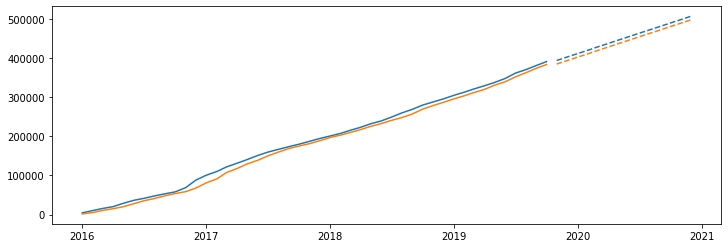

Department of Telecommunications:

Learning Confidence = 0.9980999003746136



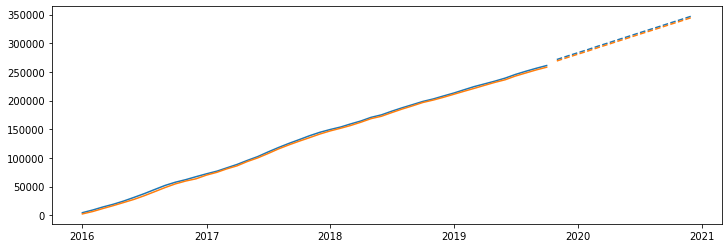

Ministry of Railways ( Railway Board):

Learning Confidence = 0.9995859327493223



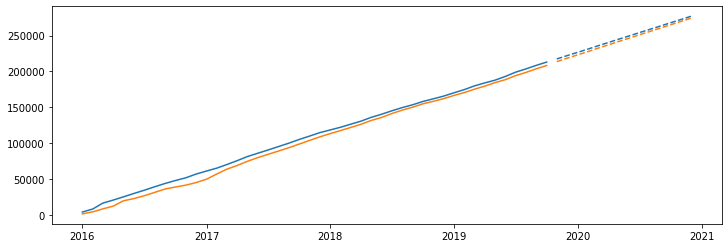

Department of Posts:

Learning Confidence = 0.9985504984757638



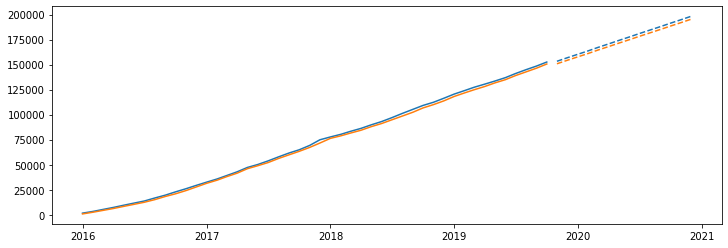

Central Board of Direct Taxes (Income Tax):

Learning Confidence = 0.9919742697065439



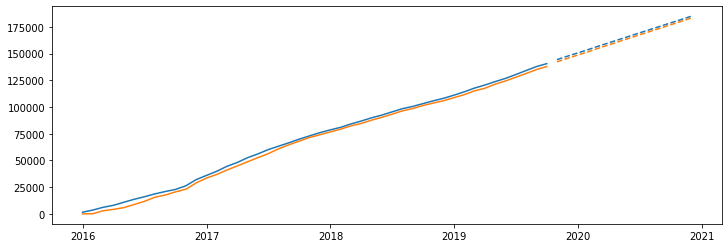

Ministry of Labour and Employment:

Learning Confidence = 0.98985606512328



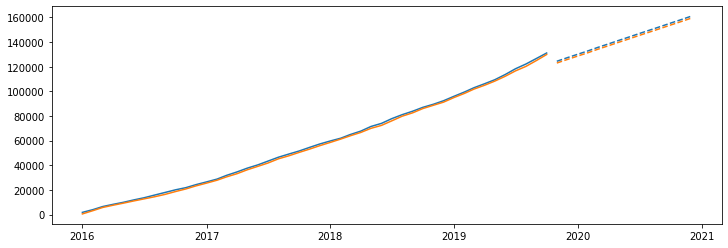

Ministry of Home Affairs:

Learning Confidence = 0.9977891665885714



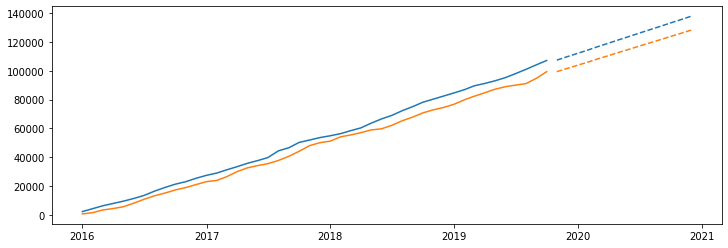

Department of Personnel and Training:

Learning Confidence = 0.9531847259279806



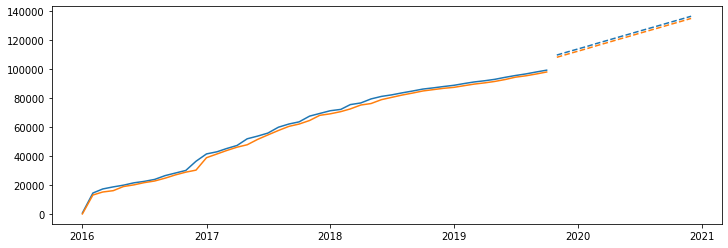

Department of Revenue:

Learning Confidence = 0.9744103659878407



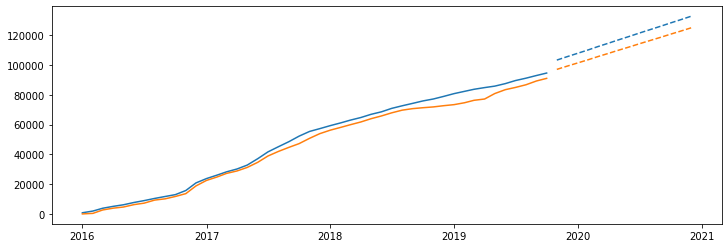

Department of Higher Education:

Learning Confidence = 0.9922157835915232



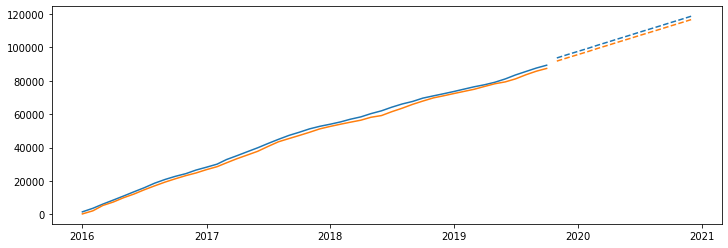

Department of Health & Family Welfare:

Learning Confidence = 0.9985083372742607



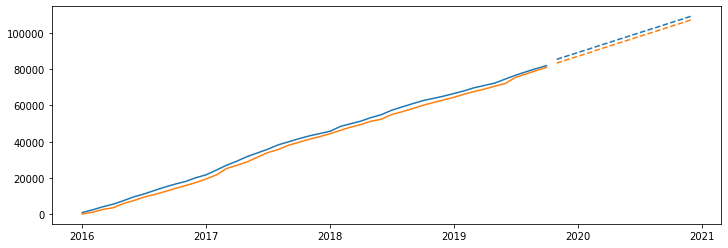

Ministry of Petroleum and Natural Gas:

Learning Confidence = 0.9907361104328645



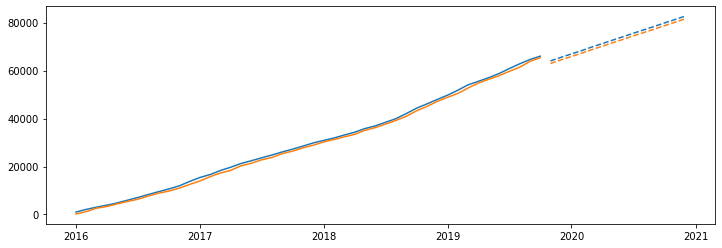

Central Board of Indirect Taxes and Customs:

Learning Confidence = 0.9808376126586291



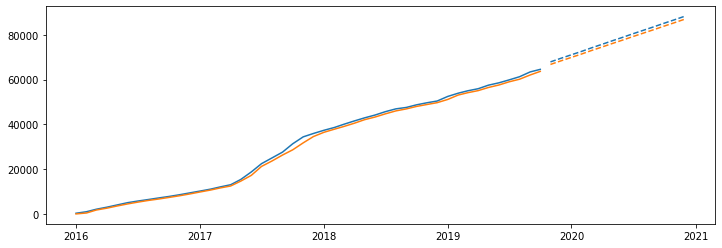

Department of School Education and Literacy:

Learning Confidence = 0.9942497330136345



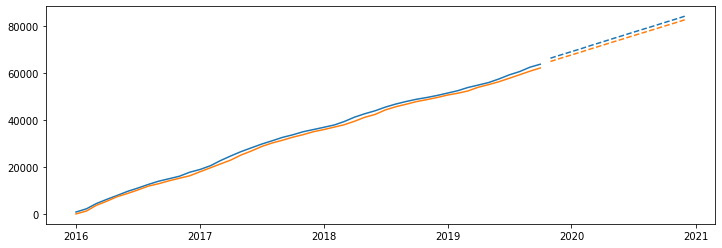

Department of Defence:

Learning Confidence = 0.9982016534441867



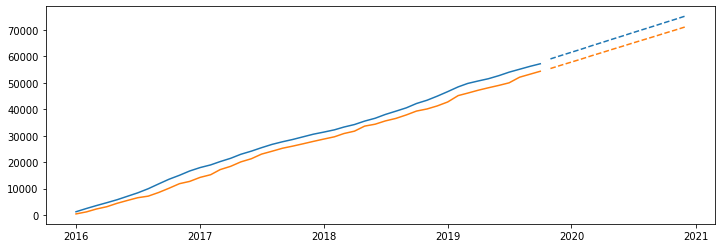

In [13]:
#takes the list of department and iterates through each of the department and prints the header, creates a linear regression model
# trains he model and uses the trained model to predict. Finally plots the data

dept_list = ['Department of Financial Services (Banking Division)', 'Department of Telecommunications', 'Ministry of Railways ( Railway Board)',  
             'Department of Posts', 'Central Board of Direct Taxes (Income Tax)', 'Ministry of Labour and Employment', 'Ministry of Home Affairs', 
             'Department of Personnel and Training', 'Department of Revenue', 'Department of Higher Education', 'Department of Health & Family Welfare', 
             'Ministry of Petroleum and Natural Gas', 'Central Board of Indirect Taxes and Customs', 'Department of School Education and Literacy', 
             'Department of Defence']
for dept in dept_list:
    dept_dataframe=group_data.get_group(dept)
    dept_dataframe=preprocess_Dataframe(dept_dataframe)
    ret = create_model(dept_dataframe, 0.25)
    statewise_linearRegression=ret[0]
    testdata_input=ret[1]
    testdata_output=ret[2]
    preddata_output=statewise_linearRegression.predict(testdata_input)
    print_header(dept, testdata_output, preddata_output)
    future_preddata_output=predict_tickets(46, 14, 1)
    future_daterange=pd.date_range('2019/10/01', periods = 14, freq = 'M')
    plot_graph(dept_dataframe, future_daterange,future_preddata_output)